In [1]:
%matplotlib widget
import time
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300

x_min, x_max = -2.5, 1.0
y_min, y_max = -1.25, 1.25
max_iterations = 100
resolution = 1000

In [2]:
from functools import cache

def mandelbrot_set(x_min, x_max, y_min, y_max, max_iterations, resolution):
    
    # mind the cache
    @cache
    def mandel(x, y, max_iterations):
        c = complex(x, y)
        c0 = c

        for iteration in range(max_iterations):
            c = c**2 + c0
            if abs(c) > 2.0:
                break

        return iteration

    x = [x_min + (x_max - x_min) / (resolution - 1) * index for index in range(resolution)]
    y = [y_min + (y_max - y_min) / (resolution - 1) * index for index in range(resolution)]

    iterations = []
    for _y in y:
        row = []
        for _x in x:
            # notice the use of abs()
            row.append(mandel(_x, abs(_y), max_iterations))

        iterations.append(row)
    
    return iterations

In [3]:
tic = time.perf_counter()

iterations = mandelbrot_set(x_min, x_max, y_min, y_max, max_iterations, resolution)

toc = time.perf_counter()
print(f"Calculating the mandelbrot set took {toc-tic:.1f} seconds.")

Calculating the mandelbrot set took 2.6 seconds.


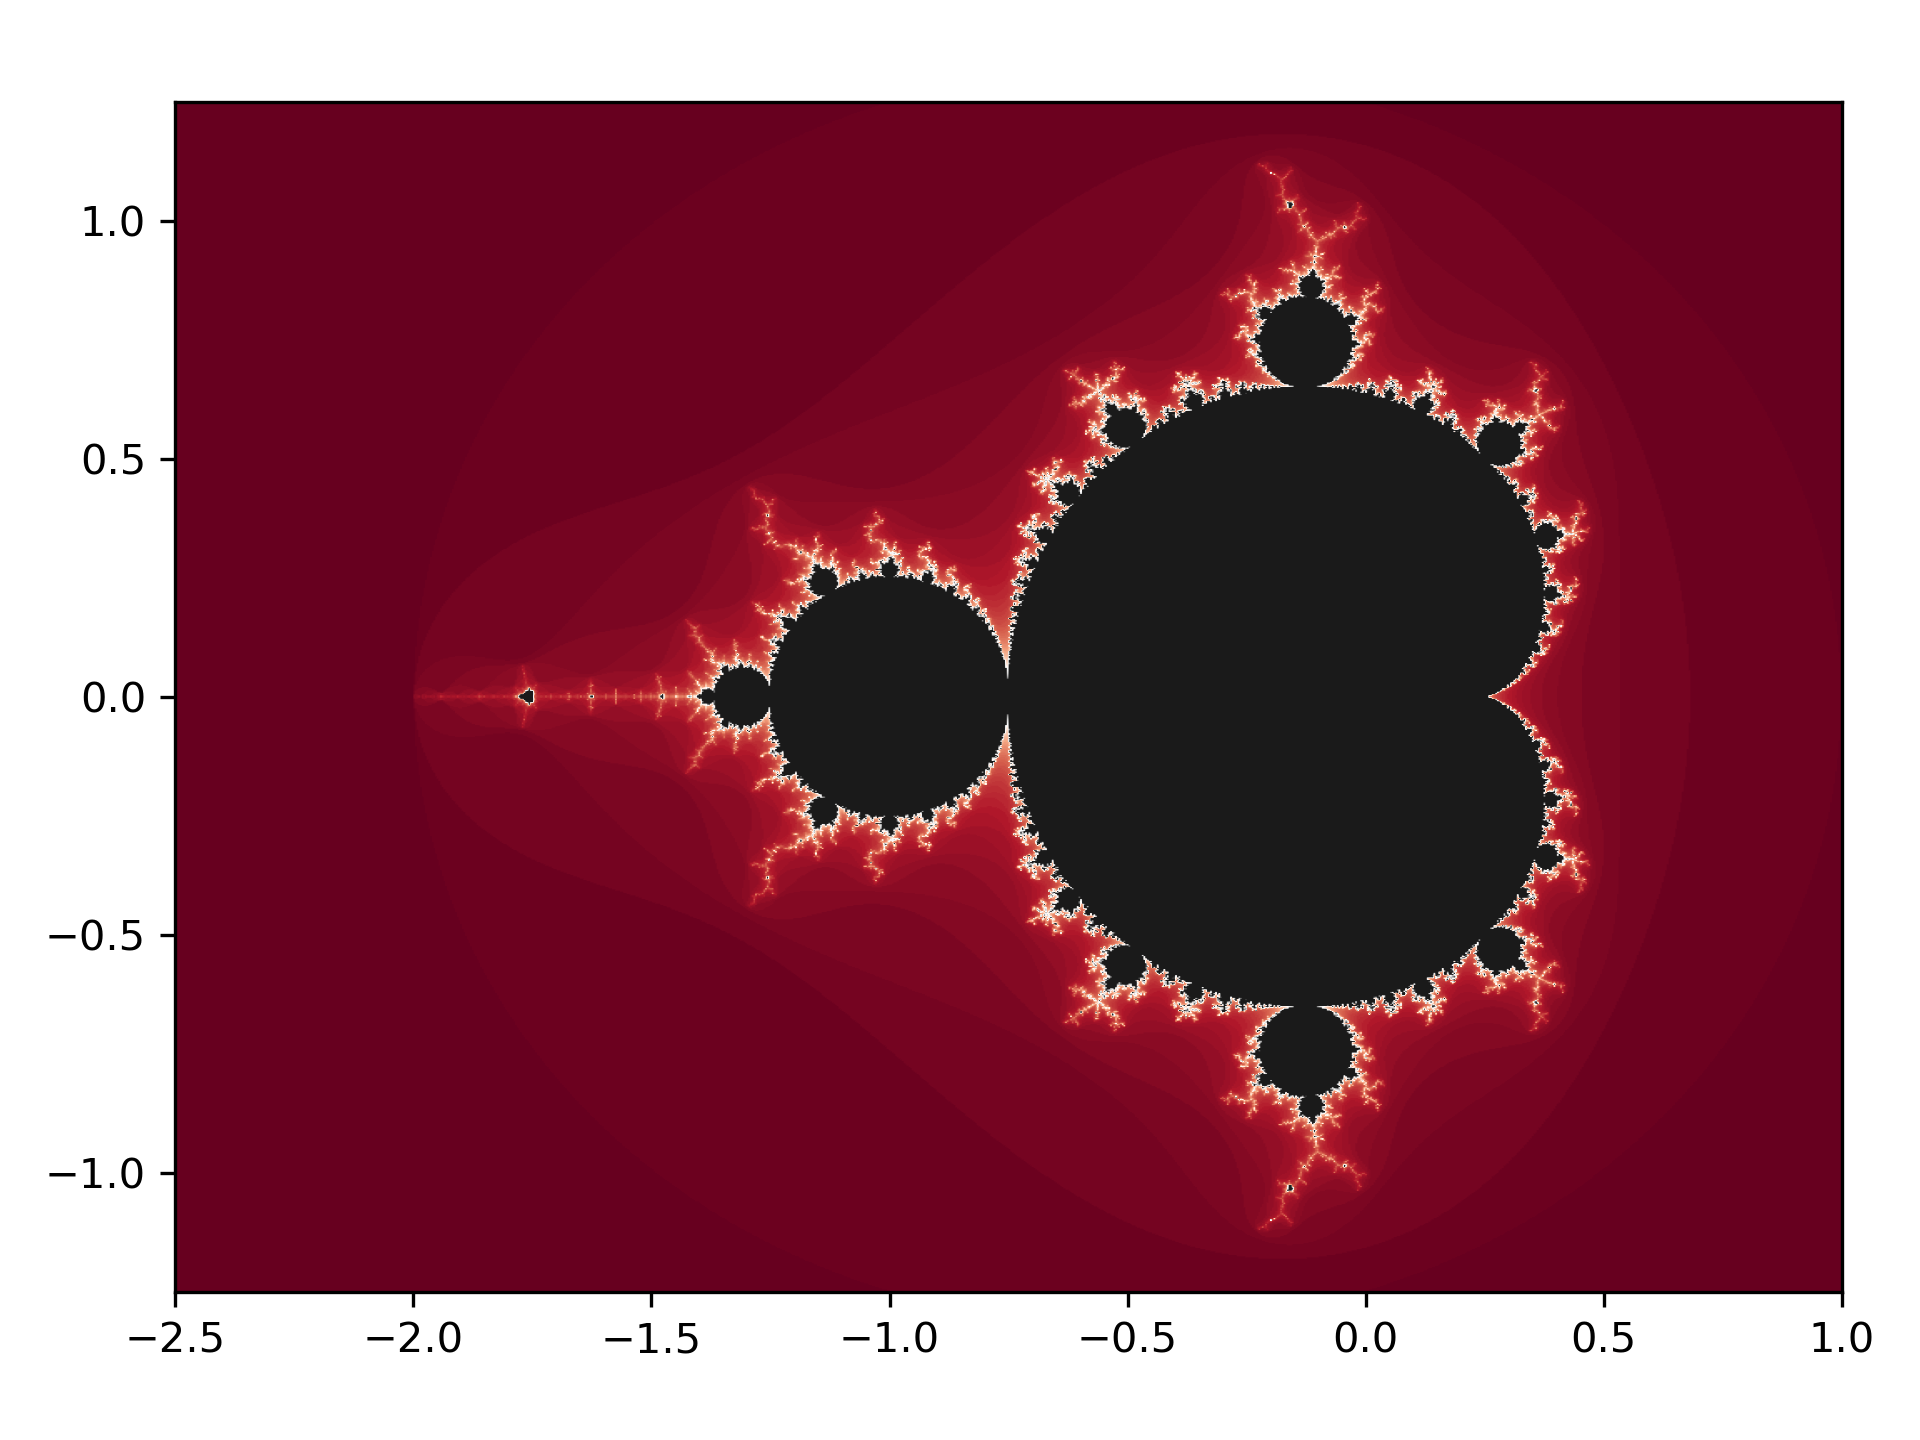

In [4]:
fig, axes = plt.subplots()
axes.imshow(iterations[::-1], extent=(x_min, x_max, y_min, y_max), cmap="RdGy")
plt.tight_layout()

In [5]:
mandel.cache_info()

NameError: name 'mandel' is not defined